In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,Flatten,BatchNormalization,Activation,Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from matplotlib import pyplot
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau, LearningRateScheduler, TensorBoard, EarlyStopping, CSVLogger
from keras import backend as K

Using TensorFlow backend.


In [2]:
def ann_model():
    Images = Input(shape=(224,224,3))
    flat_n = Flatten()(Images)
    dense1 = Dense(1000,activation='relu',kernel_initializer='glorot_uniform')(flat_n)
    dense2 = Dense(2000, activation='relu',kernel_initializer='he_normal')(dense1)
    dense3 = Dense(1000,activation='relu')(dense2)
    dense4 = Dense(10,activation='relu')(dense3)
    dropout = Dropout(0.3)(dense4)
    dense5 = Dense(2,activation='softmax')(dropout)
    model = Model(inputs=Images,outputs=dense5)
    model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])
    return model

In [3]:
train_datagen = ImageDataGenerator(rotation_range=180,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range = 0.25)

test_datagen = ImageDataGenerator(rotation_range=None,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [4]:
path = 'train'
train_generator = train_datagen.flow_from_directory(path,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical')
path = 'test'
test_generator = test_datagen.flow_from_directory(path,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
ann_model = ann_model()
ann_model.summary()
plot_model(ann_model, to_file='ann.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              150529000 
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
__________

In [7]:
batch_size = 32
epochs = 200
class_weight = {0:1,1:4.347}
history = ann_model.fit_generator(
        train_generator,
        steps_per_epoch = 50 ,
        epochs = epochs,
         class_weight = class_weight,
        validation_data=test_generator,
        validation_steps = 13)

Epoch 1/200
50/50 [==============================] - 72s - loss: 13.0349 - acc: 0.8131 - val_loss: 3.1316 - val_acc: 0.8057
Epoch 2/200
50/50 [==============================] - 68s - loss: 13.0363 - acc: 0.8134 - val_loss: 3.0002 - val_acc: 0.8139
Epoch 3/200
50/50 [==============================] - 68s - loss: 13.0415 - acc: 0.8113 - val_loss: 3.0659 - val_acc: 0.8098
Epoch 4/200
50/50 [==============================] - 68s - loss: 13.0370 - acc: 0.8125 - val_loss: 3.3068 - val_acc: 0.7948
Epoch 5/200
50/50 [==============================] - 68s - loss: 12.9928 - acc: 0.8137 - val_loss: 2.9783 - val_acc: 0.8152
Epoch 6/200
50/50 [==============================] - 73s - loss: 12.9294 - acc: 0.8137 - val_loss: 3.1097 - val_acc: 0.8071
Epoch 7/200
50/50 [==============================] - 69s - loss: 12.9928 - acc: 0.8131 - val_loss: 2.9783 - val_acc: 0.8152
Epoch 8/200
50/50 [==============================] - 68s - loss: 12.9080 - acc: 0.8137 - val_loss: 3.0221 - val_acc: 0.8125
Epoch 9/

50/50 [==============================] - 69s - loss: 12.9059 - acc: 0.8144 - val_loss: 3.0427 - val_acc: 0.8112
Epoch 67/200
50/50 [==============================] - 67s - loss: 13.1471 - acc: 0.8103 - val_loss: 3.1754 - val_acc: 0.8030
Epoch 68/200
50/50 [==============================] - 68s - loss: 12.9029 - acc: 0.8150 - val_loss: 2.8469 - val_acc: 0.8234
Epoch 69/200
50/50 [==============================] - 69s - loss: 13.0360 - acc: 0.8131 - val_loss: 3.0002 - val_acc: 0.8139
Epoch 70/200
50/50 [==============================] - 72s - loss: 12.8871 - acc: 0.8134 - val_loss: 2.7374 - val_acc: 0.8302
Epoch 71/200
50/50 [==============================] - 70s - loss: 12.9714 - acc: 0.8131 - val_loss: 3.0002 - val_acc: 0.8139
Epoch 72/200
50/50 [==============================] - 68s - loss: 13.0367 - acc: 0.8128 - val_loss: 3.0440 - val_acc: 0.8111
Epoch 73/200
50/50 [==============================] - 68s - loss: 12.9701 - acc: 0.8141 - val_loss: 3.0440 - val_acc: 0.8111
Epoch 74/200


50/50 [==============================] - 67s - loss: 13.0600 - acc: 0.8044 - val_loss: 3.1535 - val_acc: 0.8043
Epoch 132/200
50/50 [==============================] - 68s - loss: 13.0594 - acc: 0.8066 - val_loss: 3.1535 - val_acc: 0.8043
Epoch 133/200
50/50 [==============================] - 70s - loss: 12.8439 - acc: 0.8088 - val_loss: 3.0016 - val_acc: 0.8138
Epoch 134/200
50/50 [==============================] - 67s - loss: 13.1001 - acc: 0.8063 - val_loss: 3.0002 - val_acc: 0.8139
Epoch 135/200
50/50 [==============================] - 73s - loss: 12.9527 - acc: 0.8081 - val_loss: 3.0659 - val_acc: 0.8098
Epoch 136/200
50/50 [==============================] - 68s - loss: 12.9730 - acc: 0.8088 - val_loss: 3.0221 - val_acc: 0.8125
Epoch 137/200
50/50 [==============================] - 69s - loss: 12.9071 - acc: 0.8100 - val_loss: 2.9564 - val_acc: 0.8166
Epoch 138/200
50/50 [==============================] - 68s - loss: 12.9303 - acc: 0.8078 - val_loss: 2.9564 - val_acc: 0.8166
Epoch 

50/50 [==============================] - 71s - loss: 12.8875 - acc: 0.8097 - val_loss: 2.9345 - val_acc: 0.8179
Epoch 197/200
50/50 [==============================] - 73s - loss: 13.0363 - acc: 0.8072 - val_loss: 2.8469 - val_acc: 0.8234
Epoch 198/200
50/50 [==============================] - 71s - loss: 13.0357 - acc: 0.8094 - val_loss: 2.9345 - val_acc: 0.8179
Epoch 199/200
50/50 [==============================] - 67s - loss: 13.1254 - acc: 0.8025 - val_loss: 3.0659 - val_acc: 0.8098
Epoch 200/200
50/50 [==============================] - 67s - loss: 12.8626 - acc: 0.8103 - val_loss: 2.9564 - val_acc: 0.8166


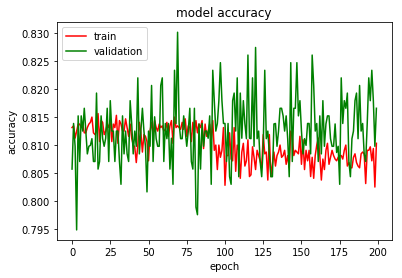

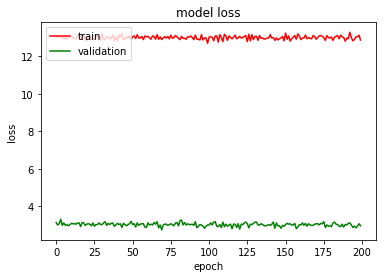

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],color='r')
plt.plot(history.history['val_acc'],color='g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()